In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

______________________
### Question 1

#### a) How does the regularized estimator (predictor) $\hat{\beta}^{\text{ridge}}_0$ compare with the OLS estimator?

The ridge estimator introduces a regularization term to the OLS estimator by adding a penalty term λ to the sum of squared residuals. This penalty shrinks the estimates towards zero, mitigating the issue of multicollinearity and reducing the variance of the estimates. Thus, compared to the OLS estimator, the ridge estimator tends to produce coefficient estimates that are smaller in magnitude.

#### b) Suppose that $\beta_0 = 1$ and $\varepsilon \sim N(0,\sigma^2)$ with $\sigma^2 = 4$. Generate a sample of size $n = 20$ from the model and compute the predicted value $\hat{Y} = f(\mathbf{x}) = \hat{\beta}^{\text{ridge}}_0$ for a grid of $\lambda$ values  the interval $[0, 20]$.

In [2]:
# Defining parameters
beta = 1
variance = 4
standard_dev = 2
n = 20
lambda_values = range(1,21)

# Making a function for ridge estimator 
def ridge_estimator(Y, lambda_val):
    return np.sum(Y) / (n + lambda_val)

# Generating epsilons
epsilon = np.random.normal(loc=0, scale= standard_dev, size=n)

# defining our equation
Y = beta + epsilon

# generating ridge estimates
ridge_estimates = [ridge_estimator(Y, lambda_val) for lambda_val in lambda_values]

for i, lambda_val in enumerate(lambda_values):
    data = {'Lambda': lambda_values, 'Ridge_Estimator': ridge_estimates}

df = pd.DataFrame(data)
df = df.sort_values(by = 'Lambda').reset_index(drop= True)
df

,Lambda,Ridge_Estimator
0,1,1.293534
1,2,1.234737
2,3,1.181052
3,4,1.131842
4,5,1.086568
5,6,1.044777
6,7,1.006082
7,8,0.970150
8,9,0.936697
9,10,0.905474


As you can see above as the $\lambda$ increases (penalty increases), beta ridge shrinks towards 0

####  c) Repeat part b), say, 1000 times so that you end up with 1000 estimates of $\beta_0$ for all the $\lambda$ values that you have picked. For each value of $\lambda$, compute $\text{bias}^2[\hat{\beta}^{\text{ridge}}_0]$, $\text{Var}[\hat{\beta}^{\text{ridge}}_0]$ and $\text{MSE}[\hat{\beta}^{\text{ridge}}_0] = \text{bias}^2[\hat{\beta}^{\text{ridge}}_0] + \text{Var}[\hat{\beta}^{\text{ridge}}_0]$.

In [3]:
# Defining parameters
beta = 1
variance = 4
standar_dev = 2
n = 20
R = 1000
lambda_values = [random.uniform(0, 20) for _ in range(1000)]

# Making a function for ridge estimator 
def ridge_estimator(Y, lmbda, n):
    return np.sum(Y) / (n + lmbda)

# Initializing an array to store simulation results
results_array = np.zeros((R, len(lambda_values)))

# Performing the simulations for 1000 runs
for i in range(R):
    
    # Generating epsilons
    epsilon = np.random.normal(0, standard_dev, size=n)
    
    # defining our equation
    Y = beta + epsilon

    # generating ridge estimates
    for j, lmbda in enumerate(lambda_values):
        results_array[i, j] = ridge_estimator(Y, lmbda, n)

# Calculating the bias, variance, and mse for each lambda

bias_squared = (np.mean(results_array, axis=0) - beta)**2
var = np.var(results_array, axis=0)
mse = np.mean((results_array - beta) ** 2, axis=0)


In [4]:
# Creating DataFrame for the results

results_df = pd.DataFrame({
                            'lambda': lambda_values,
                            'bias_squared': bias_squared,
                            'variance': var,
                            'mse': mse
                            })
results_df.round(5)

,lambda,bias_squared,variance,mse
0,8.51120,0.09375,0.10129,0.19503
1,4.39669,0.03578,0.13833,0.17412
2,19.77509,0.25267,0.05204,0.30471
3,0.83723,0.00257,0.18963,0.19220
4,19.99987,0.25549,0.05146,0.30695
...,...,...,...,...
995,12.34438,0.15086,0.07870,0.22956
996,14.21219,0.17791,0.07034,0.24825
997,10.19862,0.11899,0.09028,0.20927
998,17.74215,0.22645,0.05780,0.28426


#### d) Plot $\text{bias}^2[\hat{\beta}^{\text{ridge}}_0]$, $\text{Var}[\hat{\beta}^{\text{ridge}}_0]$ and $\text{MSE}[\hat{\beta}^{\text{ridge}}_0]$as a function of λ and interpret the results. Can a ridge regression give a better prediction than OLS?

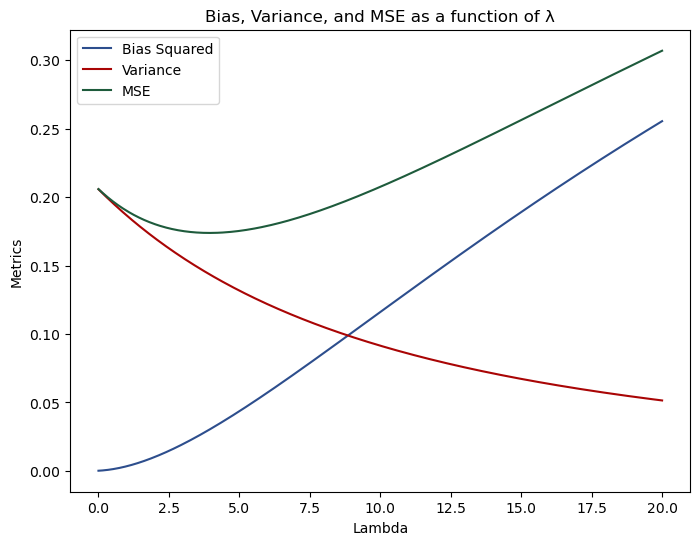

In [5]:
# sorting the results by lambda to ensure a smooth plot
df = results_df.sort_values(by ='lambda').reset_index(drop = True)

plt.figure(figsize=(8, 6))

# plotting curves for metrics
plt.plot(df['lambda'], df['bias_squared'], label='Bias Squared', color='#2D4E8D')
plt.plot(df['lambda'], df['variance'], label='Variance', color='#A90505')
plt.plot(df['lambda'], df['mse'], label='MSE', color='#1E5B3C')

# customizing the graph
plt.xlabel('Lambda')
plt.ylabel('Metrics')
plt.title('Bias, Variance, and MSE as a function of λ')
plt.legend()

# Show the plot
plt.show()

As seen above, as $\lambda$ increases in value, MSE decreases when $\lambda$ is below 5. But as $\lambda$ goes above 5, the MSE starts to increase as a result of increased <b>Bias</b>. Ridge regression can indeed provide better predictions than OLS in situations where the model suffers from multicollinearity or overfitting. 
However, whether ridge regression outperforms OLS depends on the dataset and the relationship between the predictors and the target variable. It's essential to cross-validate different values of λ to find the optimal regularization parameter that minimizes prediction error on unseen data Typically, if there is a large amount of multicollinearity in the data if there are a very large number of features compared to the number of observations, ridge regression can outperform OLS by reducing overfitting. However, if the data has low amounts of multicollinearity and the model is not overfit, OLS might perform just as well or better.<br><br>
It is clearly visible here that the optimal regularization parameter is where the <b>rmse</b> curve has the zero gradient.

_______________________________________
### Question 2

Suppose we estimate the regression coefficients in a linear regression model by minimizin for a particular value of s 
 $\sum_{i=1}{n} \left (y_i-\beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 \text {subject to} \sum_{j=1}^{p} |\beta_j |\leq s$$


#### (a) As we increase s from 0, the training RSS will:
(iv) As $s$ increases, the model becomes more flexible (the sum of absolute coefficients can be higher). 
With more flexible models, training RSS will always decrease.

#### (b) As we increase s from 0, the test RSS will:
(ii) As $s$ increases, test RSS will decrease (as the fit improves) and 
will then increase due to overfitting (high variance).

#### (c) As we increase s from 0, the variance will:

(iii) $s$ increases, the model becomes more flexible so variance will 
increase.

#### (d) As we increase s from 0, the (squared) bias will:
(iv) As $s$ increases, the model becomes more flexible so bias will decrease.

#### (e) As we increase s from 0, the irreducible error will:
(v) The irreducible error is unchanged.

_______________________________________
### Question 3

#### a) Load the data set called PCA_data.csv (posted). Designate the first $N_tr$ = 500 observations as the training sample and the last $N_te$ = 500 as the test sample.

In [6]:
# Loading dataset
data = pd.read_csv("https://raw.githubusercontent.com/arbash-malik/ceutest/main/PCA_data.csv")
data.shape

(1000, 51)

In [7]:
# Splitting datasets two train and test base on instructions

train_data = data.iloc[:500]
test_data = data.iloc[500:]
print(train_data.shape,test_data.shape)

(500, 51) (500, 51)


#### b) Compute the first 10 principal component vectors and the corresponding scores $Z^*_1, \ldots, Z^*_{10} \text{ for } (X_1, X_2, \ldots, X_{50}).$ For simplicity, you can use the whole data set for this (both the training sample as well as the test sample).


In [8]:
# Defining our features, notice I am using the whole dataset for simplicity
X = data.drop(columns=['Y'])

# defining pca for first 10 components
pca = PCA(n_components=10)

# generating pca for our features i.e. scores
X_pca = pca.fit_transform(X)

# generating pca vectors
pca_vectors = pca.components_

Since I used the whole dataset the scores for our 10 principal components should have <b>1000 rows and 10 columns</b> 

In [9]:
pca_scores_df = pd.DataFrame(X_pca)
pca_scores_df

,0,1,2,3,4,5,6,7,8,9
0,1.550813,-2.969900,0.266870,0.176298,1.975678,-1.984950,-0.622387,-1.895895,1.272643,-1.061790
1,2.796457,-2.478049,-0.537794,-4.001977,1.001814,1.762772,1.311465,-2.171148,-0.364102,-0.727871
2,-4.258792,-2.646664,0.101065,0.672758,-5.053154,1.809042,0.563095,1.003430,0.347364,0.213761
3,2.640480,-2.963876,0.645814,-0.162655,-2.902141,1.728624,-0.553962,-0.364074,-1.420493,1.047444
4,0.588773,-1.423325,-1.484459,0.392362,-1.639872,0.555689,-0.633406,1.147074,-0.607015,0.761238
...,...,...,...,...,...,...,...,...,...,...
995,-5.271205,-1.862550,1.395689,1.794850,-0.151471,-1.019582,1.419347,0.179233,0.361237,1.966619
996,1.419846,1.342020,2.643999,0.307626,-2.923582,1.378393,-2.402624,0.248879,-1.229594,-1.429284
997,-0.838113,4.706998,1.036644,1.927274,-1.572015,-0.500307,3.290315,-0.970069,-2.116115,-0.760155
998,0.859032,-0.015379,0.881978,0.192559,0.440007,-1.542458,0.755911,-3.617349,2.572571,1.064998


Creating a data frame for the vectors, it should have <b>10 rows and 50 columns</b>

In [10]:
pca_vectors_df = pd.DataFrame(pca_vectors)
pca_vectors_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.027388,-0.098019,-0.269744,0.181047,0.246482,0.282822,0.198561,-0.085632,-0.140379,0.132491,...,0.065853,-0.019037,-0.079064,0.126563,0.037256,-0.220341,0.082255,0.170687,0.148157,-0.073999
1,-0.381372,-0.150501,-0.218531,-0.225914,0.246905,-0.096135,0.169228,0.284436,-0.034893,-0.159722,...,0.101870,0.000323,-0.014565,-0.028300,0.022728,0.068500,0.048700,-0.058439,-0.033594,0.061777
2,0.135457,-0.151683,0.091685,-0.265109,-0.023350,0.273535,-0.015602,-0.225424,-0.336539,-0.240365,...,-0.124948,-0.082087,0.150557,0.038960,0.068991,0.018221,0.026856,0.050558,-0.014444,0.022796
3,0.072816,0.363306,0.142812,0.047356,0.066880,0.028447,-0.136363,0.018662,-0.223719,-0.036699,...,0.073910,0.121699,0.118773,0.043403,0.192058,-0.072065,-0.043148,-0.128390,-0.061100,0.136319
4,0.007030,0.058492,0.105989,-0.179049,0.137061,0.059219,0.248118,-0.102082,0.116107,0.154072,...,-0.117475,-0.166458,0.045889,-0.265696,-0.011826,0.037997,-0.214739,-0.104668,0.077657,-0.003634
5,-0.122206,0.031947,-0.147922,0.064614,0.183645,-0.042296,0.200268,0.110992,0.032992,0.244192,...,-0.300129,0.311129,0.027045,0.042498,-0.010430,0.052286,0.152002,-0.034500,-0.088324,0.212584
6,0.008457,-0.118484,0.086494,-0.019080,-0.208889,-0.077795,0.015465,0.061941,0.042156,0.096308,...,0.027857,0.202126,-0.122051,-0.139691,0.225883,-0.205335,-0.039952,0.278136,-0.059205,0.072725
7,0.088732,0.064761,0.083768,-0.028446,0.010675,0.159175,-0.046480,-0.011393,0.056287,-0.059907,...,-0.038180,-0.053654,-0.003629,-0.250998,0.137598,0.073501,-0.239498,0.057085,0.083264,0.032880
8,-0.004483,0.127418,0.079405,-0.071394,0.047101,-0.057471,-0.074218,-0.058288,0.163015,-0.167969,...,-0.079659,-0.080481,-0.142428,0.112122,0.200382,-0.105377,0.087142,-0.066710,-0.143680,0.119151
9,0.035510,-0.042247,0.077319,-0.025709,-0.048175,-0.058868,0.200919,-0.042180,0.067586,0.042890,...,0.229922,-0.031818,-0.265717,-0.080445,0.191052,0.015225,0.074461,-0.094366,-0.112369,-0.180375


#### c) Estimate an OLS regression of Y on a constant and $X_1, \ldots, X_{50}$ over the training sample. Estimate OLS regressions of Y on a constant and $Z^*_1, \ldots, Z^*_k$ over the training sample for $k = 1, 5, 10$.

In [11]:
# defining our train features
X_train = train_data.drop(columns=['Y'])
y_train = train_data['Y']

# defining our test features
X_test = test_data.drop(columns=['Y'])
y_test = test_data['Y']

#defining our pca
pca = PCA(n_components=10)

#defining our train pca
X_pca = pca.fit_transform(X_train)

#defining our test pca
X_pca_test = pca.transform(X_test)

##### Estimating our models
1. OLS on X

In [12]:
# Perform OLS regression prediction
ols_reg = LinearRegression().fit(X_train, y_train)

2. OLS on Z

In [13]:
# Define the values for for k components
k_values = [1, 5, 10]

# Initialize estimation for the k componenonents
for k in k_values:
    exec(f"ols_reg_k{k} = LinearRegression().fit(X_pca[:, :{k}], y_train)")


#### d) Use the four models estimated under part c) the obtain predictions for the outcomes $Y_i$ in the test sample. Compute the mean squared prediction error for the four different predictions and report these numbers. You should get results similar to those on slide 22, but there will be some differences because the whole experiment is performed only once. (The slide averages over many experiments.)

1. Predicting on OLS on X

In [14]:
# Initialize a dictionary to store MSEs
mse_results = {}

prediction_ols = ols_reg.predict(X_test)
mse_ols = np.mean((prediction_ols - y_test)**2)

mse_results['OLS'] = mse_ols

2. Predicting on OLS on Z

In [15]:
# Define the values for k components
k_values = [1, 5, 10]

# Initialize estimation for the k components
for k in k_values:
    exec(f"ols_reg_k{k} = LinearRegression().fit(X_pca[:, :{k}], y_train)")

# Predict for X_pca_test for each k and calculate MSE
for k in k_values:
    exec(f"predictions_k{k} = ols_reg_k{k}.predict(X_pca_test[:, :{k}])")
    mse_k = np.mean((globals()[f"predictions_k{k}"] - y_test)**2)
    mse_results[f'PCA k= {k}'] = mse_k


Creating a dataframe to compare results

In [16]:
mse_df = pd.DataFrame(list(mse_results.items()), columns=['Model', 'MSE'])

mse_df.round(3)

,Model,MSE
0,OLS,4.334
1,PCA k= 1,15.018
2,PCA k= 5,12.470
3,PCA k= 10,9.035


#### e) Consider again the original ’Dense DGP’ table on slide 22, Lecture 3. Discuss and explain the MSPE patterns you see in the first column ($N_tr$ = 75) and the last column ($N_tr$ = 500).


From the slide The MSPE decreases in all the models as the N increases from 75 to 500

**OLS:**<br>
As the OLS model is conducted over an incrementally larger number of observations, the MSPE decreases. This suggests that more observations in the training data improves the performance of the model. 

**PCA 1:**<br>
As the N increases the MSPE does decrease, but not very drastically. This is likely because it is not capture the variance in the data as it aims to capture the maximum amount of variance in the data with just one feature.The variance in the data is not totally caputured by k = 1, MSPE is almost 4 times as the OLS one in N = 500.


**PCA 5:**<br>
As the N increases, the MSPE decreases at a higher rate than the k=1 model. This could indicate that the increase in observations as well as the increase in dimensions in the pca has improved the accuracy of this model. However, the variance in the data is still not totally caputured by k = 5, MSPE is almost 3 times as the OLS one in N = 500.

**PCA 10:**<br>
As the N increases, the MSPE decreases as well. This could indicate that the increase in observations as well as the increase in dimensions in the pca has improved the accuracy of this model. However, the variance in the data is still not totally caputured by k = 10, MSPE is more than 2 times as the OLS one in N = 500.


*See below for the variance explained by each model*

In [17]:
k_values = [1, 5, 10]

for k in k_values:
    total_variance_in_features = round(np.sum(np.var(X_pca[:, :k], axis=0)),2)
    print(f"Model k={k} captured variance: {total_variance_in_features}%")


Model k=1 captured variance: 5.72%
Model k=5 captured variance: 22.3%
Model k=10 captured variance: 34.62%
